# Module 16: Naive Bayes Classifier
## Section– Practice Notebook with TODOs

This notebook is for **practice**. It is aligned with the teaching notebook for Section 16.5.

You will work with two datasets:
1. A **synthetic numeric dataset** created with `make_classification` (for GaussianNB).
2. A **subset of the 20 Newsgroups text dataset** (for MultinomialNB and BernoulliNB).

Where you see `TODO`, write the required code yourself.
You can always refer back to the teaching notebook if you get stuck.

In [ ]:
# ===============================================================
# Imports and basic setup
# ===============================================================

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification, fetch_20newsgroups
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns

plt.rcParams['figure.figsize'] = (7, 4)
sns.set(style='whitegrid')

## Part A – Gaussian Naive Bayes on Synthetic Numeric Data

In this part you will:
- Create a synthetic numeric dataset.
- Split into train and test sets.
- Train a Gaussian Naive Bayes model.
- Evaluate the model with accuracy and a confusion matrix.
- Experiment by changing the dataset difficulty.


In [ ]:
# Create a synthetic numeric dataset for binary classification
X, y = make_classification(
    n_samples=600,
    n_features=6,
    n_informative=4,
    n_redundant=0,
    n_clusters_per_class=1,
    class_sep=1.6,
    random_state=42
)

print('Shape of X:', X.shape)
print('Shape of y:', y.shape)
print('Class distribution:', np.bincount(y))

Shape of X: (600, 6)
Shape of y: (600,)
Class distribution: [302 298]


In [ ]:
# TODO 1: Split the data into training and test sets
# Use train_test_split with test_size=0.25 and random_state=42
# Save the result in X_train, X_test, y_train, y_test

# from sklearn.model_selection import train_test_split  # already imported above

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

print('Training set shape:', X_train.shape)
print('Test set shape:', X_test.shape)


Training set shape: (450, 6)
Test set shape: (150, 6)


In [ ]:
# TODO 2: Create and train a GaussianNB model
# 1. Create an instance of GaussianNB
# 2. Fit it on the training data

# Example structure:
# gnb = GaussianNB()
# gnb.fit(X_train, y_train)

# Create the model
gnb = GaussianNB()

# Fit the model on the training data
gnb.fit(X_train, y_train)

print('Model training completed.')

Model training completed.


In [ ]:
# TODO 3: Make predictions on the test set and compute accuracy
# 1. Use the trained model to predict on X_test
# 2. Compute accuracy_score using y_test and predictions


# Make predictions on the test set
y_pred = gnb.predict(X_test)

# Compute accuracy
acc = accuracy_score(y_test, y_pred)

print('Accuracy of GaussianNB on synthetic data:', acc)

Accuracy of GaussianNB on synthetic data: 0.9733333333333334


Confusion matrix:
 [[73  3]
 [ 1 73]]


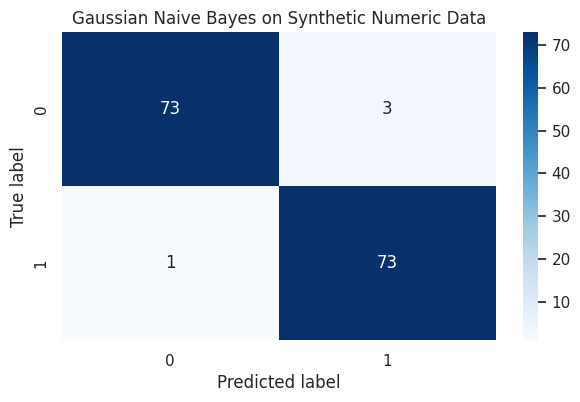

In [ ]:
# TODO 4: Compute and plot the confusion matrix
# Steps:
# 1. Compute confusion_matrix using y_test and y_pred
# 2. Print the confusion matrix
# 3. Plot it with sns.heatmap

cm = confusion_matrix(y_test, y_pred)
print('Confusion matrix:\n', cm)

# Plot the confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Gaussian Naive Bayes on Synthetic Numeric Data')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

In [ ]:
# TODO 5: Print a classification report
# Use classification_report with y_test and y_pred

report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.99      0.96      0.97        76
           1       0.96      0.99      0.97        74

    accuracy                           0.97       150
   macro avg       0.97      0.97      0.97       150
weighted avg       0.97      0.97      0.97       150



### Experiment: Change the Dataset Difficulty

- Recreate the dataset with a smaller `class_sep` value, such as `class_sep=0.8`.
- Repeat training and evaluation.
- Observe how accuracy and the confusion matrix change.

You can copy your previous code cells and adjust only the `make_classification` call.

## Part B – Naive Bayes for Text Classification (20 Newsgroups Subset)

In this part you will:
- Load a subset of the 20 Newsgroups dataset.
- Convert text into numeric features using `CountVectorizer`.
- Train a `MultinomialNB` classifier.
- Train a `BernoulliNB` classifier with binary features.
- Compare their performance.


In [ ]:
# Fetch a subset of the 20 Newsgroups dataset
categories = ['comp.graphics', 'rec.sport.baseball', 'sci.med', 'talk.politics.misc', 'sci.space']

newsgroups = fetch_20newsgroups(
    subset='train',
    categories=categories,
    remove=('headers', 'footers', 'quotes'),
    shuffle=True,
    random_state=42
)

print('Number of documents:', len(newsgroups.data))
print('Target names:', newsgroups.target_names)

Number of documents: 2833
Target names: ['comp.graphics', 'rec.sport.baseball', 'sci.med', 'sci.space', 'talk.politics.misc']


In [ ]:
# Put into a DataFrame for easier handling
df_text = pd.DataFrame({
    'text': newsgroups.data,
    'label': newsgroups.target
})
df_text.head()

,text,label
0,\n\n\n You are hereby authorized not to laugh...,4
1,\n\nPDR and CPS are good places to starts.\n\n...,2
2,The subject-line says it: every time I run a ...,2
3,The Phillies were picked to be in first.\nSome...,1
4,I am currently using POVRay on Mac and was won...,0


In [ ]:
# TODO 6: Split text data into train and test sets
# Use train_test_split on df_text['text'] and df_text['label']
# Suggested: test_size=0.25, random_state=42
X_train_text, X_test_text, y_train_text, y_test_text = train_test_split(
    df_text['text'], df_text['label'], test_size=0.25, random_state=42
)

print('Train size:', X_train_text.shape[0])
print('Test size:', X_test_text.shape[0])

Train size: 2124
Test size: 709


In [ ]:
# TODO 7: Convert text to count vectors for MultinomialNB
# Steps:
# 1. Create a CountVectorizer with stop_words='english' and max_features=3000
# 2. Fit on X_train_text and transform both train and test sets
#    to get X_train_counts and X_test_counts

vectorizer = CountVectorizer(stop_words='english', max_features=3000)

# Fit on training text and transform both train and test sets
X_train_counts = vectorizer.fit_transform(X_train_text)
X_test_counts = vectorizer.transform(X_test_text)

print('Shape of X_train_counts:', X_train_counts.shape)
print('Shape of X_test_counts:', X_test_counts.shape)

Shape of X_train_counts: (2124, 3000)
Shape of X_test_counts: (709, 3000)


In [ ]:
# TODO 8: Train a MultinomialNB model on the count vectors
# 1. Create a MultinomialNB instance
# 2. Fit it on X_train_counts and y_train_text

# Create the MultinomialNB model
mnb = MultinomialNB()

# Fit the model on the training count vectors
mnb.fit(X_train_counts, y_train_text)

print('MultinomialNB model trained on text data.')

MultinomialNB model trained on text data.


Accuracy of MultinomialNB on 20 Newsgroups subset: 0.8504936530324401
Confusion matrix:
 [[116   4   0   2   2]
 [ 12 125   5   0   4]
 [  8   2 136   3   4]
 [  9   8   6 125  23]
 [  4   2   7   1 101]]


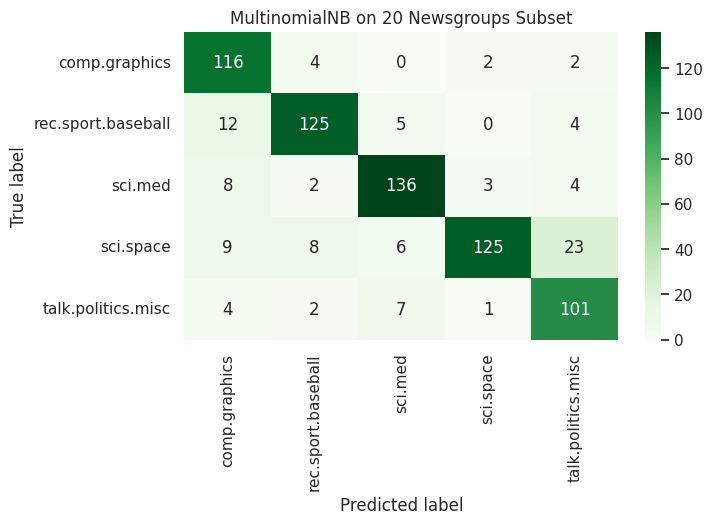

                    precision    recall  f1-score   support

     comp.graphics       0.78      0.94      0.85       124
rec.sport.baseball       0.89      0.86      0.87       146
           sci.med       0.88      0.89      0.89       153
         sci.space       0.95      0.73      0.83       171
talk.politics.misc       0.75      0.88      0.81       115

          accuracy                           0.85       709
         macro avg       0.85      0.86      0.85       709
      weighted avg       0.86      0.85      0.85       709



In [ ]:
# TODO 9: Evaluate MultinomialNB
# 1. Predict on X_test_counts
# 2. Compute accuracy
# 3. Compute and print a confusion matrix
# 4. Print a classification report with target_names=newsgroups.target_names

# Predict on the test set
y_pred_text = mnb.predict(X_test_counts)

# Compute accuracy
acc_text = accuracy_score(y_test_text, y_pred_text)
print('Accuracy of MultinomialNB on 20 Newsgroups subset:', acc_text)

# Compute confusion matrix
cm_text = confusion_matrix(y_test_text, y_pred_text)
print('Confusion matrix:\n', cm_text)

# Plot confusion matrix
sns.heatmap(cm_text, annot=True, fmt='d', cmap='Greens',
            xticklabels=newsgroups.target_names,
            yticklabels=newsgroups.target_names)
plt.title('MultinomialNB on 20 Newsgroups Subset')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

# Classification report
report_text = classification_report(y_test_text, y_pred_text, target_names=newsgroups.target_names)
print(report_text)

### 2.1 Practice: Bernoulli Naive Bayes with Binary Features

Now repeat a similar process using `BernoulliNB`:
- Use `CountVectorizer` with `binary=True`.
- Train a `BernoulliNB` model.
- Compare its accuracy and confusion matrix with `MultinomialNB`.


In [ ]:
# TODO 10: Create binary bag of words features
# 1. Create a new CountVectorizer with binary=True
# 2. Fit on X_train_text and transform train and test sets


# Create a CountVectorizer with binary features
vectorizer_bin = CountVectorizer(stop_words='english', max_features=3000, binary=True)

# Fit on training text and transform both train and test sets
X_train_bin = vectorizer_bin.fit_transform(X_train_text)
X_test_bin = vectorizer_bin.transform(X_test_text)

print('Shape of X_train_bin:', X_train_bin.shape)
print('Shape of X_test_bin:', X_test_bin.shape)

Shape of X_train_bin: (2124, 3000)
Shape of X_test_bin: (709, 3000)


Accuracy of BernoulliNB on 20 Newsgroups subset: 0.7080394922425952
Confusion matrix:
 [[114   7   0   2   1]
 [  3 142   0   0   1]
 [ 16  23 108   2   4]
 [ 40  35   3  86   7]
 [  9  41  12   1  52]]


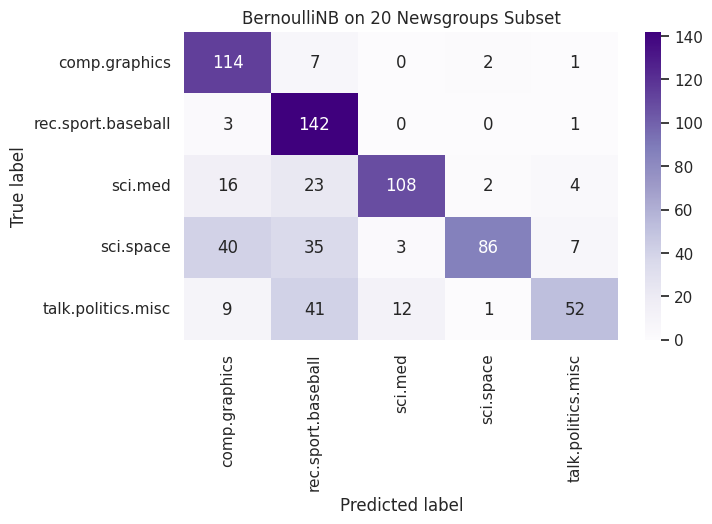

                    precision    recall  f1-score   support

     comp.graphics       0.63      0.92      0.75       124
rec.sport.baseball       0.57      0.97      0.72       146
           sci.med       0.88      0.71      0.78       153
         sci.space       0.95      0.50      0.66       171
talk.politics.misc       0.80      0.45      0.58       115

          accuracy                           0.71       709
         macro avg       0.76      0.71      0.70       709
      weighted avg       0.77      0.71      0.70       709



In [ ]:
# TODO 11: Train and evaluate BernoulliNB
# Steps:
# 1. Create a BernoulliNB model
# 2. Fit it on X_train_bin and y_train_text
# 3. Predict on X_test_bin
# 4. Compute accuracy, confusion matrix, and classification report
# 5. Compare the results with MultinomialNB

# Create the BernoulliNB model
bnb = BernoulliNB()

# Fit the model on binary features
bnb.fit(X_train_bin, y_train_text)

# Predict on the test set
y_pred_bin = bnb.predict(X_test_bin)

# Compute accuracy
acc_bin = accuracy_score(y_test_text, y_pred_bin)
print('Accuracy of BernoulliNB on 20 Newsgroups subset:', acc_bin)

# Compute confusion matrix
cm_bin = confusion_matrix(y_test_text, y_pred_bin)
print('Confusion matrix:\n', cm_bin)

# Plot confusion matrix
sns.heatmap(cm_bin, annot=True, fmt='d', cmap='Purples',
            xticklabels=newsgroups.target_names,
            yticklabels=newsgroups.target_names)
plt.title('BernoulliNB on 20 Newsgroups Subset')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

# Classification report
report_bin = classification_report(y_test_text, y_pred_bin, target_names=newsgroups.target_names)
print(report_bin)

## Final Reflection

- Which model worked better on the text data, **MultinomialNB** or **BernoulliNB**?
- How did changing the dataset difficulty in Part A affect the performance of GaussianNB?
- Where do you think Naive Bayes will perform well in real projects (for example, spam detection, topic classification)?

Write a few short notes summarizing your observations.